## Sarcasm Detection in IMDb Movie Reviews

Online reviews hold immense power in the film industry, shaping audience perception and box office success. However, sarcasm a common weapon in the reviewer's arsenal, can wreak havoc on sentiment analysis systems. These automated tools struggle to decipher sarcastic intent, leading to misinterpretations that can skew audience ratings, mislead studios, and ultimately, disappoint moviegoers.<br>

![Sarcasm](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQh2oNie2NZjxi-5yhoj__Og7FtVcuTz2pS4A&s)

Sarcasm detection involves identifying sarcastic remarks in text, which can be particularly challenging due to the subtlety and context-dependency of sarcasm.<br>

In this code snippet, we'll walk through the outline the steps to build a machine learning model for sarcasm detection in movie reviews using Random Forest.





### Step 1 : Loading the Data

We start by loading the movie review dataset, which contains both the text of the reviews and their corresponding labels (indicating whether the review is sarcastic or not).

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# File path
file_path = '/content/drive/MyDrive/IMBD/Movie sarcasm Final Dataset.xlsx'

In [3]:
# Read Excel file
import pandas as pd
df = pd.read_excel(file_path)

In [4]:
# Display the first 5 rows of data
df.head()

,Review,Sentiment,Sarcasm
0,One of the other reviewers has mentioned that ...,Positive,Non-Sarcastic
1,A wonderful little production. <br /><br />The...,Positive,Non-Sarcastic
2,This movie was a groundbreaking experience!<br...,Positive,Sarcastic
3,I thought this was a wonderful way to spend ti...,Positive,Non-Sarcastic
4,Basically there's a family where a little boy ...,Negative,Sarcastic


In [5]:
# Checking for null values
rows_with_nulls = df[df.isnull().any(axis=1)]

print("Rows with any null values:")
print(rows_with_nulls)

# Remove rows with any null values
df = df.dropna()

print("\nDataFrame with rows containing any null values removed:")
print(f"the size of the dataset after the removal of null values {df.shape}")

df

Rows with any null values:
                                                 Review Sentiment Sarcasm
2604  Everyone should totally see this movie! It's f...  positive     NaN
2605  as a sequel,this is not a bad movie.i actually...  positive     NaN
2606  I've just seen this movie in a preview and I c...  positive     NaN
2607  This TV show is possibly the most pathetic dis...  negative     NaN
2608  The first film ever made. Workers streaming fr...  positive     NaN
2609  Just kidding.<br /><br />Seeking greener pastu...  positive     NaN
2610  This film is a total bore. Entrapment is way b...  negative     NaN
2611  This was an attempt toward a romantic comedy, ...  negative     NaN
2612  There are some redeeming qualities to this sho...  negative     NaN
2613  I like David Hamilton's artistic photographs o...  positive     NaN
3087  For anyone who has ever sought happiness, "Hal...  positive     NaN
3389  The ending of this horror movie is so ambiguou...   Neutral     NaN
3402  The a

,Review,Sentiment,Sarcasm
0,One of the other reviewers has mentioned that ...,Positive,Non-Sarcastic
1,A wonderful little production. <br /><br />The...,Positive,Non-Sarcastic
2,This movie was a groundbreaking experience!<br...,Positive,Sarcastic
3,I thought this was a wonderful way to spend ti...,Positive,Non-Sarcastic
4,Basically there's a family where a little boy ...,Negative,Sarcastic
...,...,...,...
6539,This movie's idea of character development is ...,Negative,Sarcastic
6540,I guess they ran out of budget for a decent sc...,Negative,Sarcastic
6541,Who needs a plot when you have explosions ever...,Negative,Sarcastic
6542,Is there an award for most generic action movi...,Negative,Sarcastic


### Step 2 : Checking for Null Values

Before proceeding with data cleaning and analysis, it's essential to check for any missing values in the dataset. Null values can impact the quality of our analysis and may require special handling. In this section, we'll examine the dataset for any null values and address them if necessary.

In [6]:
# Check for null values in the 'Review' column
null_count = df.isnull().sum()
print(f"Number of null values in 'Review' column: {null_count}")


Number of null values in 'Review' column: Review       0
Sentiment    0
Sarcasm      0
dtype: int64


### Step 3 : Checking for Duplicate Values
Duplicate entries can skew analysis and machine learning models. In this section, we'll identify and handle duplicate records in the movie review dataset.



In [7]:
# Check for duplicate values
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 29


In [8]:
# Display the duplicate rows
duplicate_rows = df[duplicates]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
                                                 Review Sentiment  \
38    I watched this film not really expecting much,...  Negative   
39    I bought this film at Blockbuster for $3.00, b...  Negative   
41    Ever watched a movie that lost the plot? Well,...  Negative   
260   A cinematic marvel! It's like they took all th...  Positive   
261   The dialogue was so sharp, it could cut throug...  Positive   
416           The director's vision is clear... as mud.  Negative   
417   The screenplay is truly groundbreaking... if y...  Negative   
418   The acting performances are unforgettable... b...  Negative   
419   The cinematography is breathtaking... if you'r...  Negative   
420   The soundtrack is memorable... in the same way...  Negative   
421   The character dynamics are engaging... if you ...  Negative   
422   The plot twists are shocking... because you ca...  Negative   
423   The special effects are out of this world... i...  Negative   
424   The editing 

In [9]:
# Checking for duplicates based on 'Review', 'Sentiment'and 'Sarcasm'
specific_duplicates = df.duplicated(subset=['Review'])
print(f"Number of duplicate rows based on specific columns: {specific_duplicates.sum()}")

Number of duplicate rows based on specific columns: 34


In [10]:
# Remove duplicate rows from the entire dataframe
df_no_duplicates = df.drop_duplicates(subset=['Review'])
print(f"Number of rows after removing duplicates: {df_no_duplicates.shape[0]}")
df = df_no_duplicates
df.shape

Number of rows after removing duplicates: 6497


(6497, 3)

### Step 4 : Identifying Unique Values for Labelling Correction

Before proceeding with the labelling correction process, it's essential to identify all unique values present in the column of interest ("sentiment" or "sarcasm"). This step is crucial because manual labelling may lead to spelling mistakes, variations in labelling terminologies, or inconsistencies in labelling conventions.

First, let's gain an understanding of the data by examining the unique values present in the column of interest. This will help us identify any misspelled labels, variations in labelling, or redundant labels that need to be corrected.






In [11]:
# Check the count of unique values in the 'sentiment' column and 'sarcasm' column
sentiment_counts = df['Sentiment'].value_counts()
print("Count of unique values in the 'sentiment' column:")
print(sentiment_counts)

sarcasm_counts = df['Sarcasm'].value_counts()
print("Count of unique values in the 'sarcasm' column:")
print(sarcasm_counts)


Count of unique values in the 'sentiment' column:
Sentiment
Negative     2757
positive     1469
negative     1426
Positive      830
Neutral        13
Nositive        1
Negative        1
Name: count, dtype: int64
Count of unique values in the 'sarcasm' column:
Sarcasm
Sarcastic         3501
Not Sarcastic     1060
Not sarcastic      917
Non-Sarcastic      889
not Sarcastic       62
Non-sarcastic       30
non-sarcastic       16
sarcastic           14
Non-Sarcastic        3
Sarcasm              2
Non-sarcasm          1
nsa                  1
Sarcastic            1
Name: count, dtype: int64


### Step 5 : Analyzing Unique Values and Labelling Correction
After obtaining the unique values, carefully analyze them to identify any inconsistencies or variations in labelling. Pay attention to spelling mistakes, synonymous labels, or redundant categories that need to be consolidated for accurate labelling.

Once you've identified the unique values and potential labelling inconsistencies, proceed with correcting the labels. This may involve standardizing labels, correcting spelling errors, or merging synonymous categories to ensure consistency and accuracy in labelling.

In [12]:
# Lowercase the values
df['Sentiment'] = df['Sentiment'].str.lower()
df['Sarcasm'] = df['Sarcasm'].str.lower()

<ipython-input-12-5ad5a1db05fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Sentiment'].str.lower()
<ipython-input-12-5ad5a1db05fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sarcasm'] = df['Sarcasm'].str.lower()


In [13]:
sentiment_counts = df['Sentiment'].value_counts()
print("Count of unique values in the 'sentiment' column:")
print(sentiment_counts)

Count of unique values in the 'sentiment' column:
Sentiment
negative     4183
positive     2299
neutral        13
nositive        1
negative        1
Name: count, dtype: int64


In [14]:
# Change the value
df['Sentiment'] = df['Sentiment'].replace({'negative ': 'negative', 'nositive': 'positive'})

<ipython-input-14-e01205599a22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Sentiment'].replace({'negative ': 'negative', 'nositive': 'positive'})


In [15]:
# Again check Values
sentiment_counts = df['Sentiment'].value_counts()
print("Count of unique values in the 'sentiment' column:")
print(sentiment_counts)

Count of unique values in the 'sentiment' column:
Sentiment
negative    4184
positive    2300
neutral       13
Name: count, dtype: int64


In [16]:
# Check for 'Sarcasm'
sarcasm_counts = df['Sarcasm'].value_counts()
print("Count of unique values in the 'sentiment' column:")
print(sarcasm_counts)

Count of unique values in the 'sentiment' column:
Sarcasm
sarcastic         3515
not sarcastic     2039
non-sarcastic      935
non-sarcastic        3
sarcasm              2
non-sarcasm          1
nsa                  1
sarcastic            1
Name: count, dtype: int64


In [17]:
# Change the label
df['Sarcasm'] = df['Sarcasm'].replace({'sarcastic ': 'sarcastic', 'sarcasm': 'sarcastic', 'not sarcastic': 'non-sarcastic', 'nsa': 'non-sarcastic', 'non-sarcastic ': 'non-sarcastic', 'non-sarcasm': 'non-sarcastic'})

<ipython-input-17-1e23cfcf3902>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sarcasm'] = df['Sarcasm'].replace({'sarcastic ': 'sarcastic', 'sarcasm': 'sarcastic', 'not sarcastic': 'non-sarcastic', 'nsa': 'non-sarcastic', 'non-sarcastic ': 'non-sarcastic', 'non-sarcasm': 'non-sarcastic'})


In [18]:
# Again Check for 'Sarcasm' column
sarcasm_counts = df['Sarcasm'].value_counts()
print("Count of unique values in the 'sentiment' column:")
print(sarcasm_counts)

Count of unique values in the 'sentiment' column:
Sarcasm
sarcastic        3518
non-sarcastic    2979
Name: count, dtype: int64


### Step 6 : Insight from Counting Combinations of Sentiment and Sarcasm

1. **Positive Sentiment with Sarcasm** : Recognizing instances where positive sentiments are expressed sarcastically allows the sarcasm detection model to distinguish between genuine positive sentiment and sarcastic remarks disguised as positivity. By identifying patterns indicative of sarcasm within positive contexts, the model can better discern nuanced expressions.

2. **Positive Sentiment with Non-Sarcasm** : Understanding the frequency of genuinely positive sentiments without sarcasm provides a baseline for comparison. By contrasting these instances with positive sentiments accompanied by sarcasm, the model can learn to differentiate between sincere expressions of positivity and sarcastic ones, enhancing its ability to identify sarcasm accurately.

3. **Negative Sentiment with Sarcasm** : Identifying cases where negative sentiments are conveyed sarcastically helps the model capture the subtleties of sarcastic negativity. By recognizing patterns characteristic of sarcasm within negative contexts, the model can accurately identify instances where negative sentiments are expressed ironically or satirically.

4. **Negative Sentiment without Sarcasm** : Analyzing instances of sincere negative sentiments provides insight into the severity and intensity of negative opinions expressed without sarcasm. By distinguishing between genuine expressions of negativity and sarcastic ones, the model can avoid misinterpreting straightforward negative remarks as sarcastic, ensuring more accurate detection of sarcasm.

5. **Neutral Sentiment with Sarcasm** : Recognizing instances where sentiments are neutral but sarcasm is present helps the model understand sarcasm in a broader context. It allows the model to identify sarcasm even when the sentiment of the text is neither positive nor negative. By capturing sarcasm in neutral contexts, the model becomes more robust and versatile, capable of detecting sarcasm across a wide range of textual expressions.

In [19]:
# Count of each combination of sentiment and sarcasm
combination_counts = df.groupby(['Sentiment', 'Sarcasm']).size().reset_index(name='counts')
print(combination_counts)

  Sentiment        Sarcasm  counts
0  negative  non-sarcastic    1025
1  negative      sarcastic    3159
2   neutral      sarcastic      13
3  positive  non-sarcastic    1954
4  positive      sarcastic     346


### Step 7 : Removing HTML Tags from Text

When dealing with text data extracted from sources like web pages or online documents, it's common to encounter HTML tags that need to be removed for further analysis. HTML tags can contain formatting or structural information irrelevant to the text's semantic meaning.


In [20]:
# Remove HTML tags from the text columns
import re
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
    # Replace HTML line breaks with space
    clean = re.sub(r'<br\s*/?>', ' ', clean)
    # Remove extra spaces
    clean = re.sub(r'\s+', ' ', clean).strip()
    clean = re.sub(r'"', ' ', clean).strip()

df['Review'] = df['Review'].apply(remove_html_tags)

df.head()

<ipython-input-20-6a9bd2ef7ca3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review'] = df['Review'].apply(remove_html_tags)


,Review,Sentiment,Sarcasm
0,One of the other reviewers has mentioned that ...,positive,non-sarcastic
1,A wonderful little production. The filming tec...,positive,non-sarcastic
2,This movie was a groundbreaking experience! I'...,positive,sarcastic
3,I thought this was a wonderful way to spend ti...,positive,non-sarcastic
4,Basically there's a family where a little boy ...,negative,sarcastic


In [21]:
# Display data from rows 195 to 200
df.loc[195:200]

,Review,Sentiment,Sarcasm
195,I watched mask in the 80's and it's currently ...,negative,non-sarcastic
196,Phantasm ....Class. Phantasm II.....awesome. P...,negative,non-sarcastic
197,Ludicrous. Angelic 9-year-old Annakin turns in...,negative,non-sarcastic
198,"Scotty (Grant Cramer, who would go on to star ...",negative,non-sarcastic
199,If you keep rigid historical perspective out o...,positive,non-sarcastic
200,The film quickly gets to a major chase scene w...,negative,sarcastic


### Step 8 : Insight on Special Symbols and Punctuation Marks Indicative of Sarcasm

Special symbols and punctuation marks that can be indicative of sarcasm include:

1. **Ellipses (`...`)** : Often used to imply something left unsaid or to create a sarcastic tone.
2. **Quotation Marks (`"`)** : Used to indicate sarcasm by quoting words or phrases in a mocking manner.
3. **Exclamation Marks (`!`)** : Can be used to exaggerate statements, often in a sarcastic tone.
4. **Question Marks (`?`)** : Can be used to imply doubt or irony.
5. **Combination of Exclamation and Question Marks (`!?` or `?!`)** : Used to express incredulity or sarcastic surprise.
6. **Capitalization** : Using all caps for certain words to indicate sarcasm (e.g., "Oh REALLY?").
7. **Parentheses (`(` and `)`)** : Sometimes used to add sarcastic asides or comments.


In [22]:
# Clean the special symbols
def clean_review(text):
    # Remove ellipses
    text = re.sub(r'\.{2,}', '...', text)
    # Remove asterisks
    text = re.sub(r'\*{2,}', '*', text)
    # Remove any character that is not a letter, number, punctuation, or whitespace
    text = re.sub(r'[^a-zA-Z0-9\s.,!?\'\"()\-]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Review'] = df['Review'].apply(clean_review)

<ipython-input-22-90ac83c85de2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review'] = df['Review'].apply(clean_review)


In [23]:
# Display data from rows 195 to 200
df.loc[195:200]

,Review,Sentiment,Sarcasm
195,I watched mask in the 80's and it's currently ...,negative,non-sarcastic
196,Phantasm ...Class. Phantasm II...awesome. Phan...,negative,non-sarcastic
197,Ludicrous. Angelic 9-year-old Annakin turns in...,negative,non-sarcastic
198,"Scotty (Grant Cramer, who would go on to star ...",negative,non-sarcastic
199,If you keep rigid historical perspective out o...,positive,non-sarcastic
200,The film quickly gets to a major chase scene w...,negative,sarcastic


In [24]:
# Calculate the percentage of sarcasm
sarcasm_percentage = (df['Sarcasm'].value_counts(normalize=True) * 100).round(2)
sarcasm_percentage

Sarcasm
sarcastic        54.15
non-sarcastic    45.85
Name: proportion, dtype: float64

In [25]:
# Calculate the percentage of each combination of sentiment and sarcasm
combination_percentage = (df.groupby(['Sentiment', 'Sarcasm']).size() / len(df) * 100).round(2)
combination_percentage

Sentiment  Sarcasm      
negative   non-sarcastic    15.78
           sarcastic        48.62
neutral    sarcastic         0.20
positive   non-sarcastic    30.08
           sarcastic         5.33
dtype: float64

### Step 9 : Visualization of Sarcasm Distribution:

**1. Percentage of Sarcasm** : The first pie chart displays the distribution of sarcasm within the dataset. By visualizing the percentage of sarcastic remarks relative to non-sarcastic ones, you can understand the prevalence of sarcasm in the overall dataset. A higher percentage of sarcasm indicates a dataset where sarcasm is more prevalent.
Visualization of Sentiment-Sarcasm Combinations:

**2. Percentage of Sentiment-Sarcasm Combinations** : The second pie chart illustrates the distribution of different combinations of sentiment and sarcasm. This visualization provides insights into how sarcasm is distributed across different sentiment categories (positive, negative, neutral). By examining the percentages of each combination, you can identify patterns and trends in the occurrence of sarcasm within different sentiment contexts.

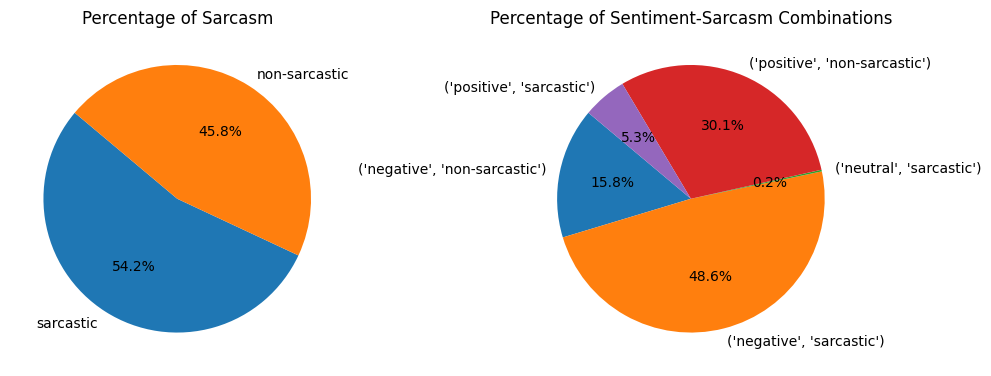

In [26]:
# Plot the data
import matplotlib.pyplot as plt

# Plotting the percentage of sarcasm
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(sarcasm_percentage, labels=sarcasm_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Sarcasm')

# Plotting the percentage of each combination of sentiment and sarcasm
plt.subplot(1, 2, 2)
plt.pie(combination_percentage, labels=combination_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Sentiment-Sarcasm Combinations')

plt.tight_layout()
plt.show()

### Step 10 : Removing Stopwords from Review Data

Stopwords are common words in a language (e.g., "the", "is", "and") that are typically filtered out before or after processing natural language data. Removing stopwords helps to focus on the more meaningful words in the reviews.


In [27]:
import nltk
from nltk.corpus import stopwords

# Download stopwords from nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Insight:

1. Takes a string of text as input.
2. Splits the text into individual words.
3. Filters out the stopwords.
4. Joins the remaining words back into a single string.
5. Returns the cleaned string.

For example : ***Another masterpiece where nothing happens, don't waste your time!***<br>
The Function would remove common stop words like **"where,"** **"nothing,"** **"don't,"** and **"your,"** leaving behind the more meaningful content of the sentence.<br>

Output : ***Another masterpiece happens, waste time!***

In [28]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['Review'] = df['Review'].apply(remove_stopwords)

<ipython-input-28-8766b28cf9f0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review'] = df['Review'].apply(remove_stopwords)


In [46]:
df.head()

,Review,Sentiment,Sarcasm
0,One reviewers mentioned watching 1 Oz episode ...,positive,non-sarcastic
1,wonderful little production. filming technique...,positive,non-sarcastic
2,movie groundbreaking experience! I've never se...,positive,sarcastic
3,thought wonderful way spend time hot summer we...,positive,non-sarcastic
4,Basically there's family little boy (Jake) thi...,negative,sarcastic


### Step 11 : Splitting the Data and Saving the Training Set
In this step, we will split our dataset into training and test sets, and then save the training data into a new CSV file. This allows us to separately preprocess the training data and use the test data for evaluating our model.<br>

**Split the Data** : Split the dataset into training and test sets using an 80-20 split.


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sarcasm'], test_size=0.2, random_state=42)

**Save the Training Data** : Create a new DataFrame containing the training data.<br>
Save this DataFrame to a new CSV file.

In [32]:
# Create a DataFrame for the training data
train_data = pd.DataFrame({'review': X_train, 'label': y_train})

# Save the training data to a new CSV file
train_data.to_csv('train_data.csv', index=False)

**Save the Testing Data** : Create a new DataFrame containing the test data.<br>
Save this DataFrame to a new CSV file.

In [33]:
# Create a DataFrame for the test data
test_data = pd.DataFrame({'review': X_test, 'label': y_test})

# Save the test data to a new CSV file
test_data.to_csv('test_data.csv', index=False)

In [35]:
# Read CSV file
import pandas as pd
df1 = pd.read_csv('/content/train_data.csv')

Installing Libraries and Packages

In [36]:
!pip install pandas nltk spacy
import subprocess

# Define the command as a list of strings
command = ["python", "-m", "spacy", "download", "en_core_web_sm"]

# Execute the command using subprocess
try:
    subprocess.run(command, check=True)
    print("en_core_web_sm model downloaded successfully!")
except subprocess.CalledProcessError as e:
    print(f"Error downloading en_core_web_sm model: {e}")



en_core_web_sm model downloaded successfully!


### Step 12 :  Lemmatization
The lemmatization and tokenization processes are applied primarily to the "Review" column because that column contains the textual data that needs to be processed for NLP (Natural Language Processing) tasks. The "Sentiment" and "Sarcasm" columns contain categorical data that do not require lemmatization or tokenization.
1. **Lemmatization** : Reducing words to their base or root form (lemmas) helps in normalizing the text. For example, "running" becomes "run," which helps in reducing the complexity of the text and making the text analysis more consistent.

In [37]:
# Function for lemmatization using spaCy
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

In [40]:
df1.head()

,review,label
0,I've already seen spin-offs cartoons Flintston...,non-sarcastic
1,probably one worst movies ever made. Bad actin...,sarcastic
2,Paint numbers story mediocre acting saved auth...,non-sarcastic
3,first murder scene one best murders film histo...,non-sarcastic
4,"""Bravo, another movie hero deep puddle rain sh...",sarcastic


In [41]:
# Apply tokenization and lemmatization
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import spacy

# Download NLTK data
nltk.download('punkt')

# Load spaCy model
nlp = spacy.load('en_core_web_sm')
df1['Lemmatized_Review'] = df1['review'].apply(lemmatize_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
df1.head()

,review,label,Lemmatized_Review
0,I've already seen spin-offs cartoons Flintston...,non-sarcastic,I have already see spin - off cartoon Flintsto...
1,probably one worst movies ever made. Bad actin...,sarcastic,"probably one bad movie ever make . bad act , b..."
2,Paint numbers story mediocre acting saved auth...,non-sarcastic,paint number story mediocre acting save authen...
3,first murder scene one best murders film histo...,non-sarcastic,first murder scene one good murder film histor...
4,"""Bravo, another movie hero deep puddle rain sh...",sarcastic,""" Bravo , another movie hero deep puddle rain ..."


In [44]:
df1.shape

(5197, 3)

### Step 13 : Tokenization
**Tokenization** : The tokenization processes are applied primarily to the "Review" column because that column contains the textual data that needs to be processed for NLP (Natural Language Processing) tasks. The "Sarcasm" columns contain categorical data that do not require tokenization.<br>

After evaluating various tokenization methods, word tokenization emerges as the best choice for our sarcasm detection model on movie reviews. It strikes a balance between computational efficiency and the ability to capture contextual nuances, making it well-suited for a test dataset of 5197 movie reviews.<br>
###Evaluation Criteria
**Dataset Size** : With 5197 reviews, the choice of tokenization needs to balance simplicity and effectiveness.<br>
**Content Type** : Movie reviews often have rich, descriptive language and context-specific terms.<br>

###Suitability for Movie Reviews
**Rich Vocabulary** : Movie reviews typically contain a wide range of vocabulary and expressions. Word tokenization captures these variations effectively.<br>
**Handling Negations and Idioms** : Sarcasm in movie reviews can be conveyed through negations and idiomatic expressions, which are better captured through word tokenization.<br>

In [45]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Function for word tokenization
def word_tokenize_reviews(reviews):
    return reviews.apply(lambda x: word_tokenize(x))

# Tokenize the lemmatized reviews
df1['Tokenized_Review'] = word_tokenize_reviews(df1['Lemmatized_Review'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [51]:
df1.head()

,review,label,Lemmatized_Review,Tokenized_Review
0,I've already seen spin-offs cartoons Flintston...,non-sarcastic,I have already see spin - off cartoon Flintsto...,"[I, have, already, see, spin, -, off, cartoon,..."
1,probably one worst movies ever made. Bad actin...,sarcastic,"probably one bad movie ever make . bad act , b...","[probably, one, bad, movie, ever, make, ., bad..."
2,Paint numbers story mediocre acting saved auth...,non-sarcastic,paint number story mediocre acting save authen...,"[paint, number, story, mediocre, acting, save,..."
3,first murder scene one best murders film histo...,non-sarcastic,first murder scene one good murder film histor...,"[first, murder, scene, one, good, murder, film..."
4,"""Bravo, another movie hero deep puddle rain sh...",sarcastic,""" Bravo , another movie hero deep puddle rain ...","[``, Bravo, ,, another, movie, hero, deep, pud..."


### Step 14 : Label Encoding
**Purpose** : Encodes categorical variables into integer labels.<br>
**Usage** : Often used for encoding target variables or categorical variables with ordinal relationships.<br>
**Advantages**:
- Converts categorical labels into integers, making them easier for machine learning algorithms to process as they typically work with numerical data.<br>

**Considerations** :
- Assigns integers based on the alphabetical order or first appearance in the dataset, potentially implying an ordinal relationship between categories (e.g.,sarcastic = 1, non-sarcastic = 0), which may not always be appropriate if categories have no inherent order.

- Transformation may discard some nuances present in original categorical labels, potentially affecting model performance in tasks relying on subtle differences between categories (e.g., sarcasm detection).

In [53]:
from sklearn.preprocessing import LabelEncoder
# Apply Label encoder on sentiment and sarcasm columns
encoder = LabelEncoder()
df1['Sarcasm_Label'] = encoder.fit_transform(df1['label'])

In [54]:
df1.head()

,review,label,Lemmatized_Review,Tokenized_Review,Sarcasm_Label
0,I've already seen spin-offs cartoons Flintston...,non-sarcastic,I have already see spin - off cartoon Flintsto...,"[I, have, already, see, spin, -, off, cartoon,...",0
1,probably one worst movies ever made. Bad actin...,sarcastic,"probably one bad movie ever make . bad act , b...","[probably, one, bad, movie, ever, make, ., bad...",1
2,Paint numbers story mediocre acting saved auth...,non-sarcastic,paint number story mediocre acting save authen...,"[paint, number, story, mediocre, acting, save,...",0
3,first murder scene one best murders film histo...,non-sarcastic,first murder scene one good murder film histor...,"[first, murder, scene, one, good, murder, film...",0
4,"""Bravo, another movie hero deep puddle rain sh...",sarcastic,""" Bravo , another movie hero deep puddle rain ...","[``, Bravo, ,, another, movie, hero, deep, pud...",1


**Output Explanation** :
1. **Encoded Sarcasm Labels** : Each unique sarcasm category (sarcastic, non-sarcastic, etc.) is assigned a unique numerical label.<br>Similarly, labels are assigned in alphabetical order (**non-sarcastic** = 0, **sarcastic** = 1).<br>

So now we do Lebel Encoding for test data


In [66]:
df2 = pd.read_csv('/content/test_data.csv')
df2.shape

(1300, 2)

In [67]:
from sklearn.preprocessing import LabelEncoder
# Apply Label encoder on sentiment and sarcasm columns for test data
encoder = LabelEncoder()
df2['Sarcasm_Label'] = encoder.fit_transform(df2['label'])

In [68]:
df2.head()

,review,label,Sarcasm_Label
0,"First off, I'm firefighter, I'm kind para-fire...",non-sarcastic,0
1,"""Stargate SG-1"" follows intergalactic explorat...",non-sarcastic,0
2,"""Thank you, Hollywood, yet another comedy movi...",sarcastic,1
3,"""Wow, another comedy movie recycled jokes tire...",sarcastic,1
4,"""A mesmerizing exploration human condition cha...",non-sarcastic,0


Installing Libraries and Packages for encoding

In [55]:
!pip install pandas nltk spacy
import subprocess

# Define the command as a list of strings
command = ["python", "-m", "spacy", "download", "en_core_web_sm"]

# Execute the command using subprocess
try:
    subprocess.run(command, check=True)
    print("en_core_web_sm model downloaded successfully!")
except subprocess.CalledProcessError as e:
    print(f"Error downloading en_core_web_sm model: {e}")


en_core_web_sm model downloaded successfully!


In [56]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import spacy

# Download NLTK data
nltk.download('punkt')

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Step 15 : TF-IDF (Term Frequency-Inverse Document Frequency)
**Purpose** : Represents documents as vectors of term importance.<br>
**Usage** : Converts text data (after tokenization and optionally lemmatization) into numerical vectors.<br>
**Advantages** :
- It scales down the impact of common words that appear in many documents (e.g., "the", "and") which might not contribute much to sarcasm detection.
- It scales up the importance of words that are distinctive to specific documents or classes (sarcastic vs. non-sarcastic).<br>

**Considerations** :
- Useful for capturing the discriminative power of less frequent words in determining sarcasm.
- May not capture semantic relationships between words or phrases as effectively as Word2Vec.<br>

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply Tfidf on Lemmatized_Review column
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df1['Lemmatized_Review'])
print("TfidfVectorizer Vocabulary:")
print(tfidf_vectorizer.get_feature_names_out())

TfidfVectorizer Vocabulary:
['00' '000' '0000110' ... 'zzz' 'zzzz' 'zzzzzzzzzzzz']


In [58]:
# Print the output
print(X_tfidf)

  (0, 12695)	0.0343813110261375
  (0, 13593)	0.05847721175632449
  (0, 23159)	0.07007491592489515
  (0, 1693)	0.058968444536730086
  (0, 19821)	0.08583928797680532
  (0, 855)	0.0905753588858819
  (0, 21643)	0.09782347795641416
  (0, 15290)	0.10632395526897012
  (0, 24120)	0.05070934707164323
  (0, 12)	0.06369758045624425
  (0, 2120)	0.032423332159420525
  (0, 21615)	0.053658396257297965
  (0, 720)	0.08073898454017286
  (0, 21262)	0.06682673441224513
  (0, 629)	0.053972330549195306
  (0, 8216)	0.08801958728386935
  (0, 7448)	0.04228242309856182
  (0, 17692)	0.0884161997171992
  (0, 15063)	0.07914808610191681
  (0, 1020)	0.04628041047440435
  (0, 23026)	0.08147659445695518
  (0, 21061)	0.13180953360919823
  (0, 21893)	0.103971932817295
  (0, 19200)	0.19417094488453382
  (0, 18473)	0.26361906721839645
  :	:
  (5196, 20666)	0.029244781709733998
  (5196, 3625)	0.029321192091453372
  (5196, 12374)	0.04090540302448838
  (5196, 6917)	0.02026164730368111
  (5196, 596)	0.015862235348520704
  (51

**Output Explanation** :
1. **TfidfVectorizer Vocabulary** : ***tfidf_vectorizer.get_feature_names_out()*** prints the vocabulary learned from the data, which represents all unique words found in **df1['Lemmatized_Review']** after applying TF-IDF transformation.<br>

2. **Output Format** : The output is an array of feature names ***(words)*** sorted in lexicographical order.
Each element in the array corresponds to a unique word in the corpus (in this case, **Lemmatized_Review** column).<br>

In this step, we apply the TF-IDF (Term Frequency-Inverse Document Frequency) transformation on lemmatized column of our dataset. This technique helps in converting the text data into numerical features.<br>
now we will apply TF-IDF on  tokenized columns of our dataset that can be used for training machine learning models.

In [59]:
df1.head()

,review,label,Lemmatized_Review,Tokenized_Review,Sarcasm_Label
0,I've already seen spin-offs cartoons Flintston...,non-sarcastic,I have already see spin - off cartoon Flintsto...,"[I, have, already, see, spin, -, off, cartoon,...",0
1,probably one worst movies ever made. Bad actin...,sarcastic,"probably one bad movie ever make . bad act , b...","[probably, one, bad, movie, ever, make, ., bad...",1
2,Paint numbers story mediocre acting saved auth...,non-sarcastic,paint number story mediocre acting save authen...,"[paint, number, story, mediocre, acting, save,...",0
3,first murder scene one best murders film histo...,non-sarcastic,first murder scene one good murder film histor...,"[first, murder, scene, one, good, murder, film...",0
4,"""Bravo, another movie hero deep puddle rain sh...",sarcastic,""" Bravo , another movie hero deep puddle rain ...","[``, Bravo, ,, another, movie, hero, deep, pud...",1


### Step 16 : Check for class imbalance in dataset
Our dataset have one column Sarcasm_Label that represent target variables. <br>
Typically, this involves counting the occurrences of each class within target variables and then assessing whether there is a significant disparity between the counts of different classes.

In [62]:
# Check class distribution for Sarcasm_Label
sarcasm_counts = df1['label'].value_counts()
print("\nSarcasm Label Distribution:")
print(sarcasm_counts)
print()

# Determine if Sarcasm_Label is imbalanced
is_imbalanced = False
for count in sarcasm_counts:
    if count < 0.2 * sarcasm_counts.sum():
        is_imbalanced = True
        break

if is_imbalanced:
    print("Sarcasm Label is imbalanced")
else:
    print("Sarcasm Label is balanced")


Sarcasm Label Distribution:
label
sarcastic        2822
non-sarcastic    2375
Name: count, dtype: int64

Sarcasm Label is balanced


**Output Explanation** :<br>

**Sarcasm_Label Distribution** : Calculates the counts of each unique value in the Sarcasm_Label column.<br>

**Check Imbalance for Sarcasm_Label** : The loop for count in sarcasm_counts iterates through the counts of each unique value. If any count is less than 20% of the total count ***(0.2 * sarcasm_counts.sum())***, it flags the label as imbalanced.<br>

This approach allows us to check for imbalance in columns with two unique values (0, 1). Adjust the threshold (0.2 in this case) according to specific dataset and imbalance criteria.<br>

### Step 17 : Train Machine Learning Model
Training a Random Forest Model for Sarcasm Detection<br>

**Why Use Random Forest for Sarcasm Detection?**<br>
Random Forest is an ensemble learning method that combines multiple decision trees to improve the predictive performance and robustness of the model. Here are some reasons why Random Forest is a good choice for sarcasm detection in movie reviews:

**Handling High-Dimensional Data** :
- Movie reviews often contain a large number of features, especially after text vectorization techniques like TF-IDF. Random Forest can handle high-dimensional data efficiently.<br>

**Robustness to Overfitting** :
- By averaging the results of multiple decision trees, Random Forest reduces the risk of overfitting, which is crucial for handling the variability and complexity in textual data.<br>

**Feature Importance** :
- Random Forest provides insights into feature importance, helping us understand which words or phrases are most indicative of sarcasm in movie reviews.<br>

**Non-Linearity** :
- Sarcasm detection involves understanding context and nuances in language, which can be non-linear. Random Forest, being a non-linear model, can capture these complex patterns better than linear models.<br>

**Versatility** :
- Random Forest works well with both balanced and imbalanced datasets, making it a versatile choice for various data distributions in sarcasm detection.<br>

In this code snippet, we will train model using the training data. After training the model, we will evaluate its performance using several common evaluation metrics such as accuracy, precision, recall, and the F1 score. Additionally, we will use cross-validation to ensure the robustness of our model.

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Extract features and labels
X_text = df1['Tokenized_Review'].astype(str)  # Ensure text is treated as string
y = df1['Sarcasm_Label']

# Split the dataset into training and testing sets
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Convert text to numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train = tfidf_vectorizer.fit_transform(X_train_text)
X_test = tfidf_vectorizer.transform(X_test_text)

# Train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Random Forest Performance:
Accuracy: 0.8259615384615384
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.93      0.83       484
           1       0.93      0.73      0.82       556

    accuracy                           0.83      1040
   macro avg       0.84      0.83      0.83      1040
weighted avg       0.85      0.83      0.83      1040



### Step 18 : Check Predictions of Random Forest Model for random movie reviews

In [75]:
# Now, let's test the model with new sarcastic movie reviews
new_reviews = ['This is funny horror movie!','very bad comedy film!', 'Great movie..','This is a hilarious movie, NOT!','Best Action film ever..', 'What a masterpiece of bad acting!', 'Great, another boring film.']

# Transform these new reviews using the same TF-IDF vectorizer
new_reviews_tfidf = tfidf_vectorizer.transform(new_reviews)

# Predict the labels for the new reviews
new_predictions = rf.predict(new_reviews_tfidf)

# Output the predictions for the new reviews
for review, prediction in zip(new_reviews, new_predictions):
    print(f'Review: "{review}" - Predicted Label: {prediction}')

Review: "This is funny horror movie!" - Predicted Label: 1
Review: "very bad comedy film!" - Predicted Label: 0
Review: "Great movie.." - Predicted Label: 0
Review: "This is a hilarious movie, NOT!" - Predicted Label: 1
Review: "Best Action film ever.." - Predicted Label: 0
Review: "What a masterpiece of bad acting!" - Predicted Label: 1
Review: "Great, another boring film." - Predicted Label: 1


### Step 19 : Hyperparameter Tuning for Random Forest Model
**Sample a Smaller Subset**:
Use 10% of the training data for hyperparameter tuning to reduce the computation time.<br>
**Reduce Parameter Grid**:
Narrow down the range of hyperparameters to speed up the search process.

In [81]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

# Sample a smaller subset for hyperparameter tuning
sample_size = 0.1  # Use 10% of the data for hyperparameter tuning
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=(1-sample_size), random_state=42)

# Define the parameter grid with a smaller range
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Randomized search on hyperparameters with reduced iterations and cross-validation folds
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model on the sampled data
random_search.fit(X_train_sample, y_train_sample)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Train the model on the full training data with best parameters
best_rf = random_search.best_estimator_
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}


### Step 20 : Evaluation of Random Forest after Hyperparameter Tuning

In [82]:
# Evaluate Random Forest after Hyperparameter Tuning
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)
print("Random Forest Best Parameters:", rf_grid.best_params_)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))


Random Forest Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest Accuracy: 0.8259615384615384
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.93      0.83       484
           1       0.92      0.74      0.82       556

    accuracy                           0.83      1040
   macro avg       0.84      0.83      0.83      1040
weighted avg       0.84      0.83      0.83      1040



### Summary of Sarcasm Detection Model Performance
**Best Hyperparameters** :
- n_estimators: 200
- max_depth: 30
- min_samples_split: 2
- min_samples_leaf: 1
- bootstrap: False

### Interpretation
**Accuracy and Overall Performance**:
- The model achieves an accuracy of approximately 82.60%, indicating that it correctly predicts sarcasm or non-sarcasm in movie reviews 82.60% of the time.

**Precision and Recall**:
- Precision measures the accuracy of positive predictions (sarcastic reviews) and recall measures the fraction of relevant instances that were retrieved. For the sarcastic class (Class 1), the precision is high (92%), indicating that when the model predicts a review as sarcastic, it is correct 92% of the time.
- The recall for sarcasm is 74%, meaning the model correctly identifies 74% of all sarcastic reviews in the dataset.

**F1-score**:
- The F1-score balances precision and recall into a single metric. For both classes (non-sarcastic and sarcastic), the F1-score is around 83%, indicating a good balance between precision and recall.

**Support**:
- The support indicates the number of instances in each class. The dataset contains 484 non-sarcastic reviews and 556 sarcastic reviews.

### Conclusion:
This Random Forest model, trained on TF-IDF transformed tokenized movie reviews, shows promising performance for sarcasm detection. It effectively distinguishes between sarcastic and non-sarcastic reviews with high precision and reasonable recall. The chosen hyperparameters from the randomized search further optimize the model's performance. To further enhance the model, we can consider exploring additional feature engineering techniques.